# EMOTION DETECTION USING TEXT USING ROBERTa AND SENTIMENT ANALYSIS  
<div style='text-align:right;'><b>By AJEETH KUMAR G</b></div>

## LIBRARY IMPORT 

In [3]:
import torch
torch.__version__

'2.5.1+cpu'

In [4]:
#!pip install huggingface_hub[hf_xet]


In [5]:
#!pip install ipywidgets

In [6]:
#!pip install transformers

In [7]:
!pip install jupyterlab_widgets


In [8]:
import pandas as aju
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk

from tqdm.notebook import tqdm
from transformers import AutoTokenizer,AutoModelForSequenceClassification
from scipy.special import softmax

**Downloading *punkt* tokenizer model**

In [10]:
#nltk.download('punkt')

**Downloading nltk *pos-tagger* model**

In [12]:
#nltk.download('averaged_perceptron_tagger')

**Downloading nltk*maxent_ne_chunker* chunk model**

In [14]:
#nltk.download('maxent_ne_chunker')

In [15]:
#nltk.download('words')

In [16]:
warnings.filterwarnings('ignore')

In [17]:
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

## DATA IMPORT 

In [19]:
df = aju.read_csv('./Reviews.csv')

## EXPLORATION 

In [21]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [22]:
df.shape

(568454, 10)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [24]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [25]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [26]:
df1 = df.dropna()
df1.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [27]:
df1.shape

(568401, 10)

In [28]:
df1.Score.value_counts()

Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64

<Axes: title={'center': 'Count of Review stars '}, xlabel='Score'>

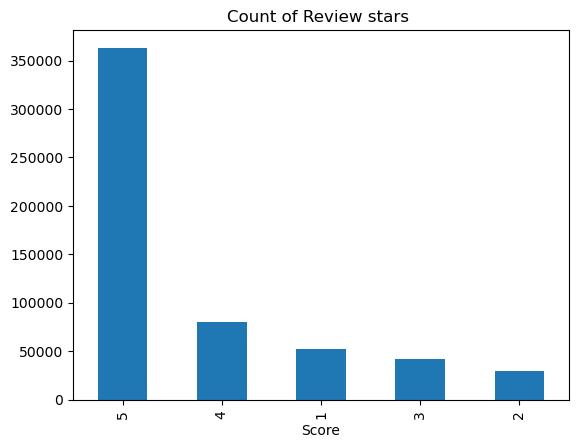

In [29]:
df1.Score.value_counts().plot(kind = 'bar',title = 'Count of Review stars ')

In [30]:
df2 = df.head(500)
df2.shape

(500, 10)

In [31]:
df2.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

## EXPLORING BASIC NLTK

In [33]:
eg = df2.Text[50]
eg

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [34]:
nltk.word_tokenize(eg)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [35]:
tokens = nltk.word_tokenize(eg)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [36]:
nltk.pos_tag(tokens) # PARTS OF SPEECH TAGS

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [37]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [38]:
##!pip install svgling

In [39]:
entity = nltk.chunk.ne_chunk(tagged)
entity.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## ROBERTa MODEL

**AS THIS PROGRAM CAN RUNNING ONLY BY CPU NOT GPU... WE USE ONLY 500 RECORDS FROM THE DATASET**

In [42]:
df2.shape

(500, 10)

**WE ARE USING A PRETRAINED ROBERTa MODEL *cardiffnlp/twitter-roberta-base-sentiment***

In [45]:
from transformers import pipeline

In [49]:
#sent_pipeline = pipeline("sentiment-analysis")